# Cartogramas com GeoPandas e GeoPlot

### Imports

In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import MultiPolygon
import geopandas as gpd
import numpy as np
import mapclassify as mc
import geoplot as gplt
import geoplot.crs as gcrs
import pandas as pd
import json

<AxesSubplot:>

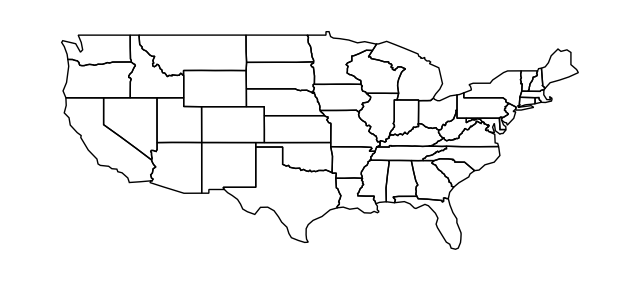

In [3]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.polyplot(contiguous_usa)

In [4]:
contiguous_usa.head()

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


Text(0.5, 1.0, 'Adult Obesity Rate by State, 2013')

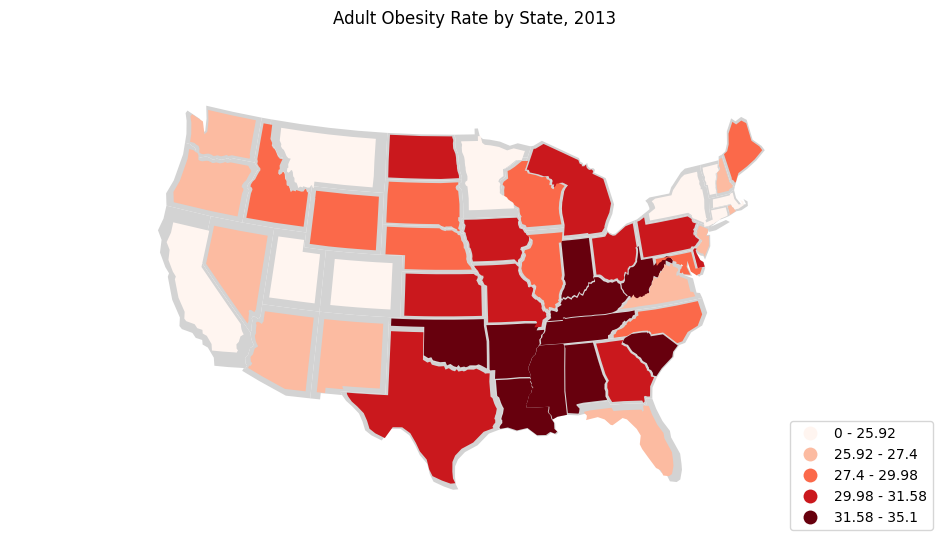

In [5]:
obesity_by_state = pd.read_csv(gplt.datasets.get_path('obesity_by_state'), sep='\t')
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
contiguous_usa['Obesity Rate'] = contiguous_usa['state'].map(
    lambda state: obesity_by_state.query("State == @state").iloc[0]['Percent']
)
scheme = mc.Quantiles(contiguous_usa['Obesity Rate'], k=5)


ax = gplt.cartogram(
    contiguous_usa,
    scale='Obesity Rate', limits=(0.75, 1),
    projection=gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
    hue='Obesity Rate', cmap='Reds', scheme=scheme,
    linewidth=0.5,
    legend=True, legend_kwargs={'loc': 'lower right'}, legend_var='hue',
    figsize=(12, 7)
)
gplt.polyplot(contiguous_usa, facecolor='lightgray', edgecolor='None', ax=ax)

plt.title("Adult Obesity Rate by State, 2013")

In [7]:
contiguous_usa.head()

,state,adm1_code,population,geometry,Obesity Rate
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",25.5
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",24.6
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",31.0
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",29.6
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",27.2


In [2]:
with open('brazil_geo.json','r') as geojson:
    brasil_geo = json.load(geojson)

In [3]:
gdf = gpd.read_file('brazil_geo.json')

In [4]:
gdf.head()

,id,name,geometry
0,AC,Acre,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350..."
1,AL,Alagoas,"MULTIPOLYGON (((-35.90153 -9.86181, -35.90153 ..."
2,AP,Amapá,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0..."
3,AM,Amazonas,"MULTIPOLYGON (((-53.62548 -26.88481, -53.61900..."
4,BA,Bahia,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708..."


In [10]:
gdf.explode().head(100)

/tmp/ipykernel_5573/3646762849.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  gdf.explode().head(100)


id     name                                           geometry
0 0   AC     Acre  POLYGON ((-73.33251 -7.32488, -73.27482 -7.350...
1 0   AL  Alagoas  POLYGON ((-35.90153 -9.86181, -35.90153 -9.862...
  1   AL  Alagoas  POLYGON ((-35.88986 -9.84431, -35.88986 -9.844...
  2   AL  Alagoas  POLYGON ((-35.91097 -9.84014, -35.91097 -9.840...
  3   AL  Alagoas  POLYGON ((-35.46212 -8.81882, -35.46654 -8.828...
...   ..      ...                                                ...
4 76  BA    Bahia  POLYGON ((-38.61875 -12.75403, -38.61875 -12.7...
  77  BA    Bahia  POLYGON ((-38.62625 -12.75097, -38.62625 -12.7...
  78  BA    Bahia  POLYGON ((-38.63820 -12.74542, -38.63820 -12.7...
  79  BA    Bahia  POLYGON ((-38.51458 -12.74180, -38.51458 -12.7...
  80  BA    Bahia  POLYGON ((-38.53708 -12.73875, -38.53708 -12.7...

[100 rows x 3 columns]

In [11]:
gdf = gdf[gdf.geom_type == 'Polygon']

In [5]:
gdf['geometry'] = gdf['geometry'].apply(lambda geom: geom if geom.geom_type == 'Polygon' else geom.convex_hull)

In [20]:
gdf.reset_index(drop=True, inplace=True)
gdf.head(10)

,id,name,geometry
0,AC,Acre,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350..."
1,DF,Distrito Federal,"POLYGON ((-48.03603 -15.50022, -47.77200 -15.5..."
2,GO,Goiás,"POLYGON ((-50.15817 -12.41238, -50.15942 -12.4..."
3,MT,Mato Grosso,"POLYGON ((-57.60524 -8.66285, -57.59355 -8.707..."
4,MS,Mato Grosso do Sul,"POLYGON ((-56.10364 -17.17354, -56.08440 -17.1..."
5,MG,Minas Gerais,"POLYGON ((-44.20978 -14.23665, -44.20907 -14.2..."
6,PI,Piauí,"POLYGON ((-41.81681 -2.74375, -41.81681 -2.744..."
7,RO,Rondônia,"POLYGON ((-63.53470 -7.97434, -63.50050 -7.976..."
8,RR,Roraima,"POLYGON ((-60.16886 5.22630, -60.16519 5.22605..."
9,TO,Tocantins,"POLYGON ((-48.35310 -5.17391, -48.32085 -5.201..."


<AxesSubplot:>

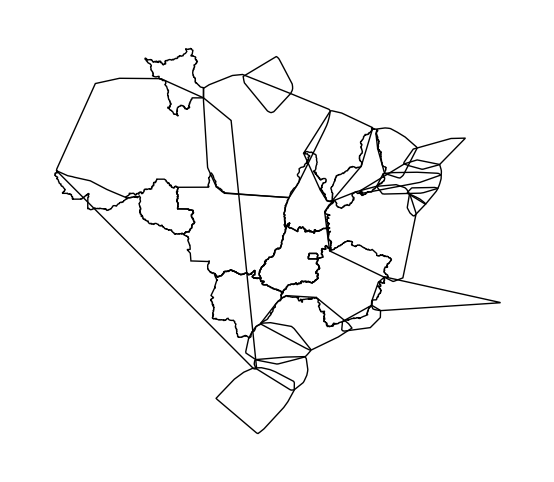

In [6]:
gplt.polyplot(gdf)

In [15]:
df1 = pd.read_csv('Covid-19/brazil_covid19.csv').drop(columns=['region']).rename(columns={'date':'Date','state':'State','cases':'Cases','deaths':'Deaths'})
df2 = pd.read_csv('Brazil-data/states.csv').rename({"UF": "State","State": "States","Demographic Density":'Density',"Cities count": "Cities"},axis=1)
df_merged = df1.merge(df2,how='left',on='State')
total_deaths = df_merged.loc[df_merged['State']=="DF","Deaths"].max()
df_grouped = pd.DataFrame(df_merged.groupby("State").apply(lambda x: x['Deaths'].max())).reset_index()
df_grouped.rename(columns={0: 'Total Deaths'},inplace=True)
df_grouped.head()


/tmp/ipykernel_5573/1938679940.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = pd.DataFrame(df_merged.groupby("State").apply(lambda x: x['Deaths'].max())).reset_index()


,State,Total Deaths
0,AC,1635
1,AL,4607
2,AM,12920
3,AP,1657
4,BA,20428


Text(0.5, 1.0, 'COVID 19 Total Deaths per State')

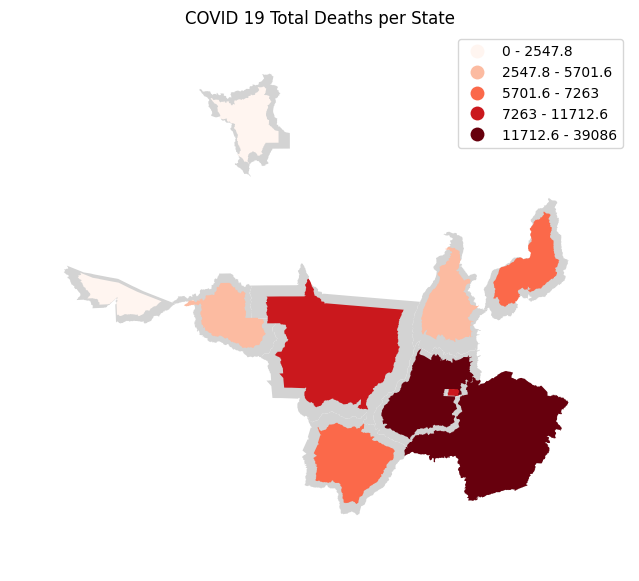

In [35]:
gdf['Death rate'] = gdf['id'].map(
    lambda state: df_grouped.query("State == @state").iloc[0]['Total Deaths']
)
scheme = mc.Quantiles(gdf['Death rate'], k=5)


ax = gplt.cartogram(
    gdf,
    scale='Death rate', limits=(0.75, 1),
    projection=gcrs.LambertAzimuthalEqualArea(),
    hue='Death rate', cmap='Reds', scheme=scheme,
    linewidth=0.5,
    legend=True, legend_kwargs={'loc': 'upper right'}, legend_var='hue',
    figsize=(12, 7)
)
gplt.polyplot(gdf, facecolor='lightgray', edgecolor='None', ax=ax)

plt.title("COVID 19 Total Deaths per State")